In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

# Manifold learning: "HELLO"

In [5]:
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold',
           size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0]/data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

(-0.20492455701086057,
 4.200541544165488,
 0.011425318271987506,
 1.0082325265663867)

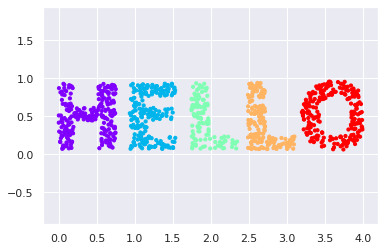

In [7]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize, s=10)
plt.axis('equal')

## multidimensional scaling MDS

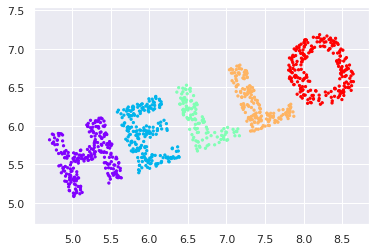

In [9]:
# rotate with rotation matrix
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize, s=5)
plt.axis('equal');

Data is not changed even though x and y are changed 
x and y values are not fundementalto the relationships in the data
what is fundamental is the **distance** between each point and other points in the dataset.
How to represent this distance  
Use a **distance matrix**: N*N matrix st (i,j) represents distance between point i and j

In [10]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

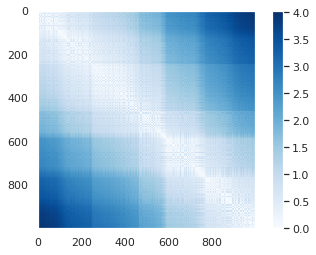

In [11]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [12]:
D2 = pairwise_distances(X2)
np.allclose(D, D2) # Returns True if two arrays are element-wise equal within a tolerance

True

same with our rotated data

multidimensional algorithm aims to do: given a distance matrix, recovers D-dimensional coordinate system representation of data

(-2.0655615093660797,
 2.12613743991648,
 -1.3705644849927077,
 1.3704231463080958)

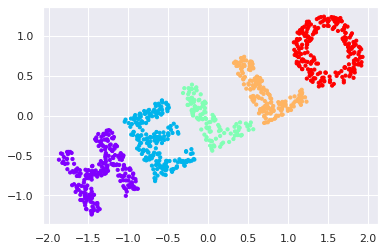

In [14]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed',
           random_state=1) # precomputed: passed distance matrix
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize, s=10)
plt.axis('equal')

Usefulness: that distance matrix can be computed from data in *any* dimension, we can project it into 3d using following function

In [ ]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]